

# Project: Investigate a Dataset - [No-show appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects informationfrom 100k medical appointments inBrazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row

### Dataset Description 
1.PatientId
2.AppointmentID
3.Gender (male,female)
4.ScheduledDay
5.AppointmentDay
6.Age
7.Neighbourhood
8.Scholarship (0,1)
9.Hipertension (0,1)
10.Diabetes (0,1)
11.Alcoholism (0,1)
12.Handcap (0,1)
13.SMS_received (0,1)
14.No-show (Yes,No)


### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

load and clean dataset

### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016 (3).csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#exploring shape of data
df.shape

(110527, 14)

In [5]:
# number of unique value
df['PatientId'].nunique()

62299

In [6]:
#look for duplications
df.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool>

In [7]:
#number of duplicated patients Ids
df['PatientId'].duplicated().sum


<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
110522     True
110523     True
110524    False
110525     True
110526     True
Name: PatientId, Length: 110527, dtype: bool>

In [8]:
#To check if there were patients ids duplicated but differ in the noshow status, we check the number of duplicated patients ids and noshow
df.duplicated(['PatientId','No-show']).sum()

38710

In [9]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# to generate descriptive statistics for a pandas DataFrame
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# age of -1
m = df.query('Age=="-1"')
m


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning

 

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [12]:
# remove -1 value
df.drop(index =99832,inplace = True)

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
# when I try to visualize it give error so I rename No-show
df= df.rename(columns={'No-show':'Noshow'})

In [15]:
#remove duplicated ids with duplicated showing status
df.drop_duplicates(['PatientId','Noshow'],inplace=True)
df.shape

(71816, 14)

In [16]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> 

### Research Question 1 (Replace this header name!)

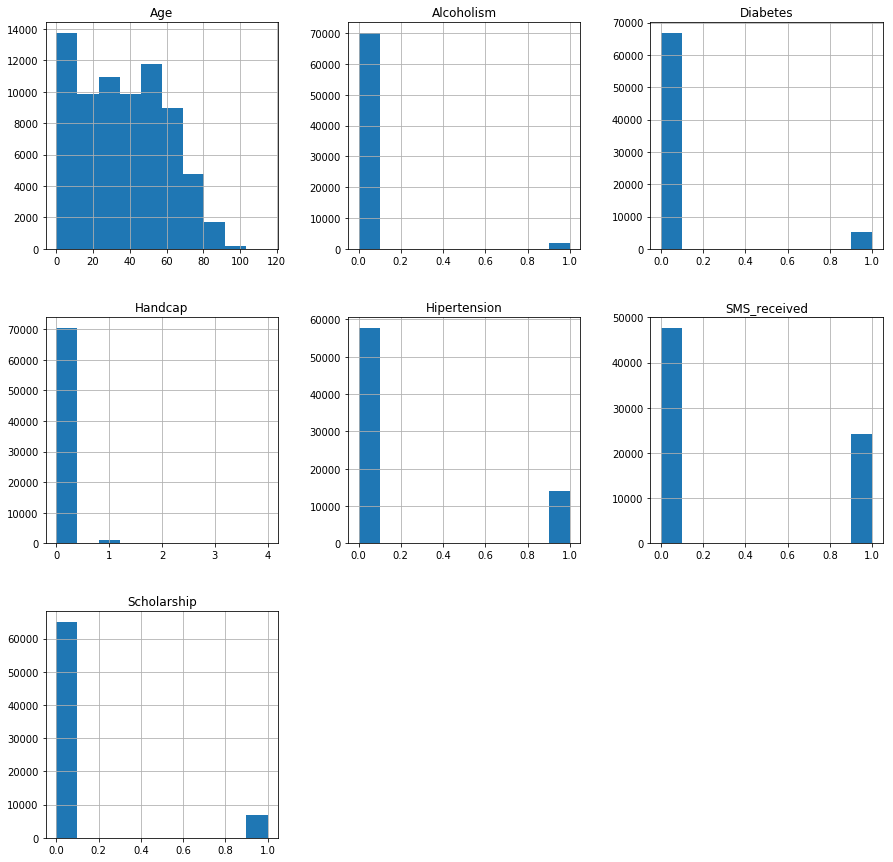

In [17]:
df.hist(figsize=(15,15));

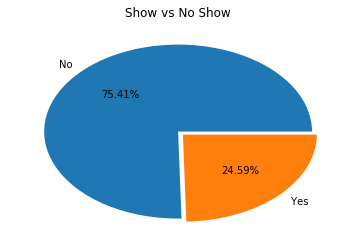

In [18]:
# Drow a figure to take a look at the show no show percentage
plt.pie(df.Noshow.value_counts(),labels=('No',' Yes'),autopct='%.2f%%', explode=(0, .05));
plt.title('Show vs No Show');

In [ ]:
#divide patients into two groups show and noshow
#show = df.Noshow =='No'
#noshow = df.Noshow =='Yes'
#df[show].count(),df[noshow].count()

In [ ]:
#df[show].mean(),df[noshow].mean()

# Does the patient gender affects on  the atendance?

In [19]:
df['Gender'].value_counts()

F    46466
M    25350
Name: Gender, dtype: int64

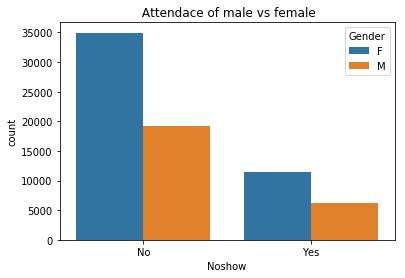

In [22]:
sns.countplot(x=df['Noshow'], hue =df['Gender']);
plt.title(' Attendace of male vs female');

females who show up are greater than the males.

# Does the neighborhood play a role in making patients don't show up? "Location of the hospital"¶)

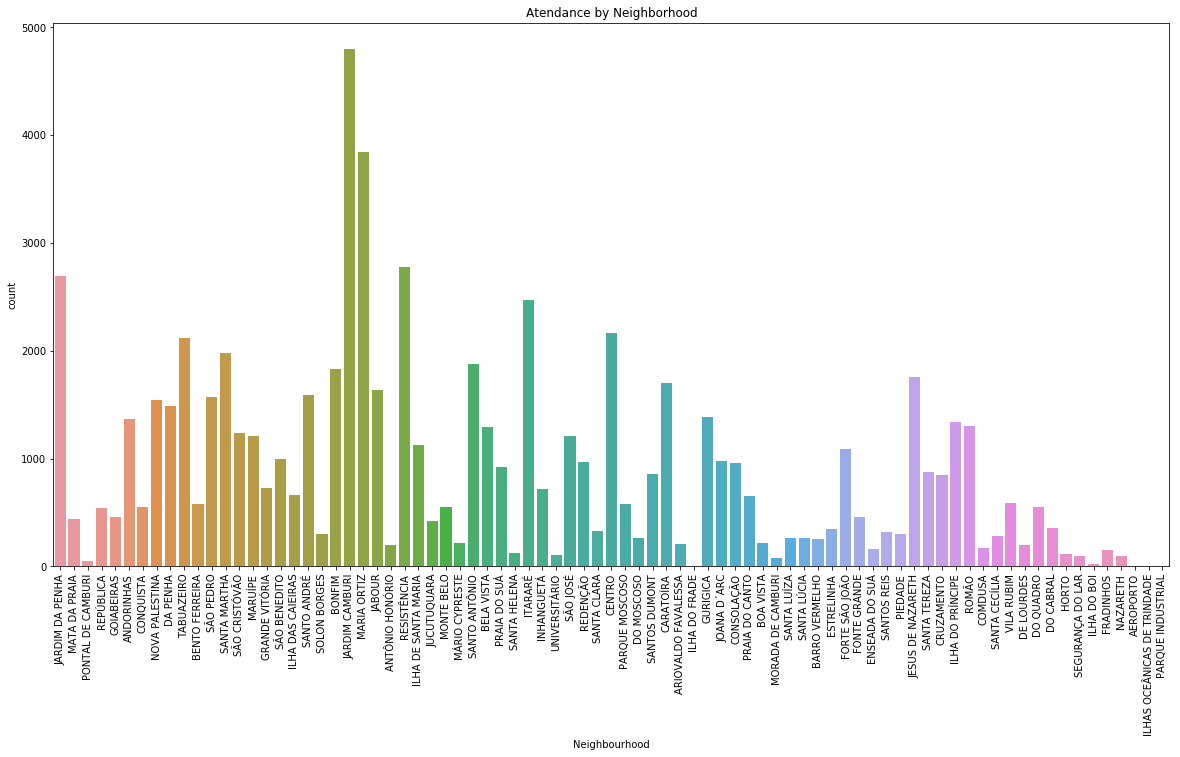

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.Neighbourhood);
plt.title('Atendance by Neighborhood')
plt.xticks(rotation=90);

some neighborhood have many people show up for their appointment and this indicates that this area has many numbers of diseases

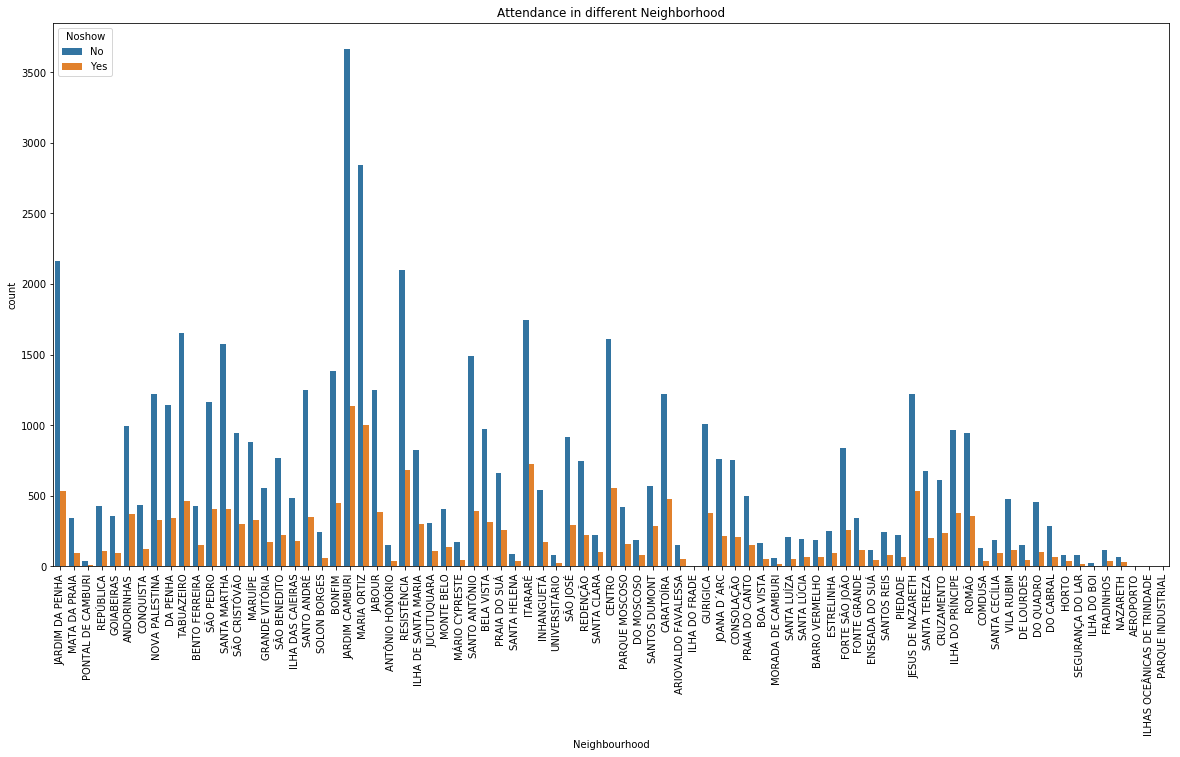

In [24]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['Neighbourhood'], hue =df['Noshow']);
plt.xticks(rotation=90);
plt.title('Attendance in different Neighborhood');

 patients attend more in the more the area where there are more disease

<a id='conclusions'></a>
## Conclusions



the factors that affect the absence of the patients more clearly. The gender is the most important factor as that female show up for their appointment more than male .  some neighborhoods that the diseases are spread and patients  tend to show up if they have it or not. 
## Submitting your Project 



In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0